# Predicting Insurance using Linear Regression

In [169]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [170]:
df_cleaned = df.dropna(subset=["age","bmi","children","charges","smoker"])

In [171]:
X = df_cleaned[["age","bmi","children","smoker"]]
Y = df_cleaned[["charges"]]

X = pd.get_dummies(X, columns=["smoker"])
X.head()

,age,bmi,children,smoker_no,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [173]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [174]:
prediction = model.predict(X_test)
prediction

array([[ 7799.48481534],
       [ 5626.55911857],
       [15597.66326261],
       [11525.70898785],
       [ 3516.30574192],
       [ 9070.42309704],
       [ 9808.85610365],
       [26046.1923827 ],
       [ 7812.86953652],
       [30284.46872652],
       [ 1748.46857395],
       [ 3663.91687507],
       [ 7160.49647298],
       [10665.68290418],
       [12333.30851818],
       [10913.21652521],
       [ 5699.33207163],
       [18631.81217952],
       [10938.70935501],
       [30610.35868223],
       [33813.36787339],
       [ 3986.99781457],
       [  749.06569504],
       [ 6816.71747084],
       [ 4500.75822099],
       [13118.26906022],
       [12234.66264286],
       [10111.41481197],
       [ 6571.89651066],
       [31483.93909726],
       [-1186.36530909],
       [34384.61694165],
       [ 9622.37017114],
       [ 7191.05488094],
       [ 8408.81264565],
       [11995.01654229],
       [13450.92127893],
       [13099.26768241],
       [ 9430.83763359],
       [ 8965.50158101],


In [175]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, prediction)
print(f"R² Score: {round(r2,2)}")

R² Score: 0.69


In [176]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print("Fold scores:", scores.round(2))
print(f"Cross-Validated R²: {scores.mean().round(2)}")

Fold scores: [0.76 0.71 0.78 0.73 0.76]
Cross-Validated R²: 0.75


In [177]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, prediction)
print(f"Mean Squared Error: {round(mse, 2)}")

Mean Squared Error: 42995813.23


In [178]:
from sklearn.model_selection import cross_val_score

cv_mse = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')

print("MSE scores for each fold:", -cv_mse.round(2))
print(f"Average MSE: {-cv_mse.mean().round(2)}")


MSE scores for each fold: [37065171.11 37824612.81 32836745.41 39880454.15 36946849.66]
Average MSE: 36910766.63


In [179]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse.round(2)}")

Root Mean Squared Error: 6557.12


In [180]:
cv_rmse = np.sqrt(-cv_mse)

print("RMSE scores for each fold:", cv_rmse.round(2))
print(f"Average RMSE: {cv_rmse.mean().round(2)}")

RMSE scores for each fold: [6088.12 6150.17 5730.34 6315.1  6078.39]
Average RMSE: 6072.42


In [181]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, prediction)
print(f"Mean Absolute Error: {round(mae,2)}")

Mean Absolute Error: 4572.02


In [182]:
from sklearn.model_selection import cross_val_score

cv_mae = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_absolute_error')

print("MAE scores for each fold:", -cv_mae.round(2))
print(f"Average MAE: {-cv_mae.mean().round(2)}")

MAE scores for each fold: [4226.99 4214.32 4024.55 4295.58 4216.37]
Average MAE: 4195.56


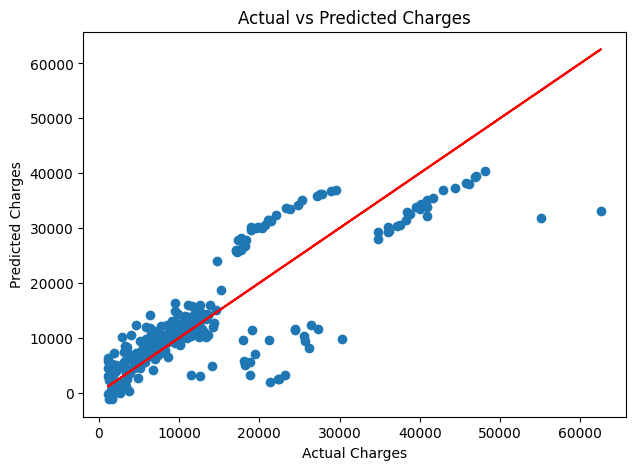

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(Y_test, prediction)
plt.plot(Y_test, Y_test, color='red')
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()



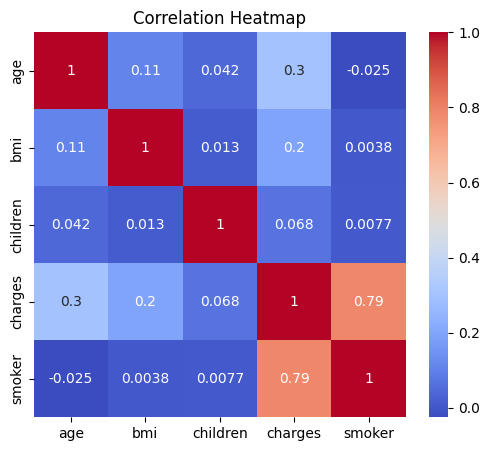

In [184]:
df_cleaned["smoker"] = df_cleaned["smoker"].map({"yes": 1, "no": 0})

plt.figure(figsize=(6,5))
sns.heatmap(df_cleaned[["age","bmi","children","charges","smoker"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

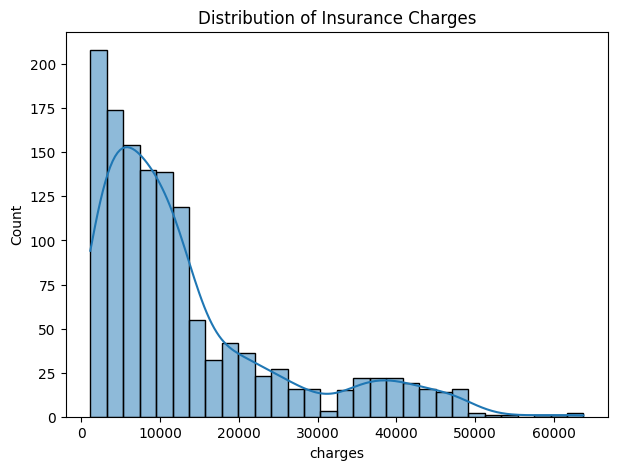

In [185]:
plt.figure(figsize=(7,5))
sns.histplot(df_cleaned["charges"], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

In [186]:
print("Coefficients:", model.coef_.round(2))

Coefficients: [[   260.3     337.03    541.49 -12029.05  12029.05]]


In [187]:
print("Intercept:", model.intercept_.round(2))

Intercept: [-776.14]


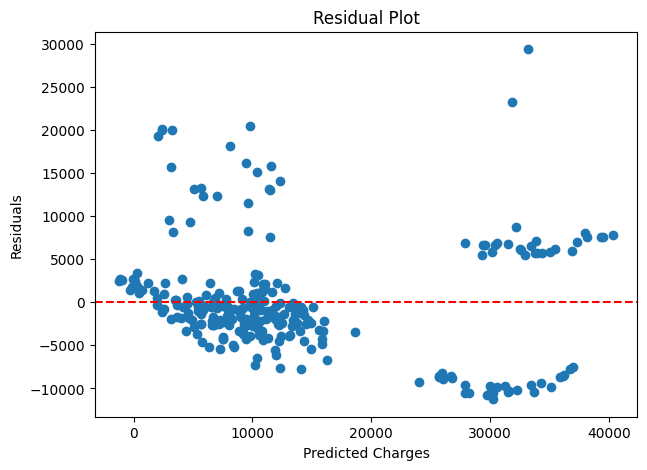

In [188]:
residuals = Y_test.values.flatten() - prediction.flatten()

plt.figure(figsize=(7,5))
plt.scatter(prediction, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.show()


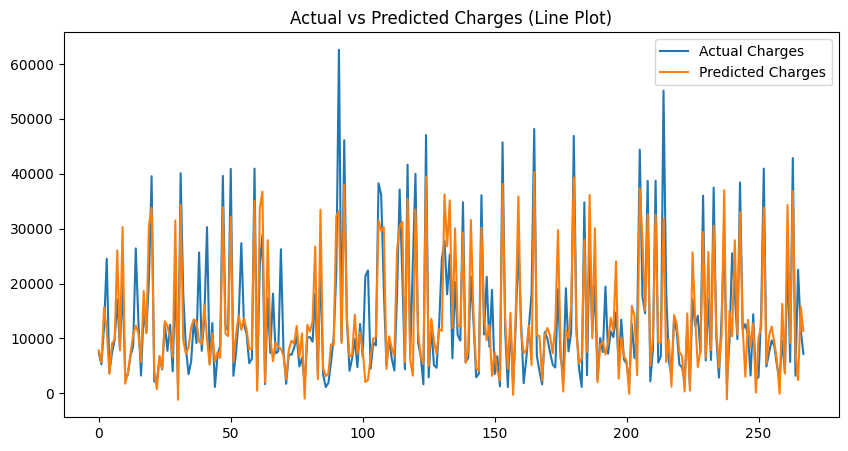

In [189]:
plt.figure(figsize=(10,5))
plt.plot(Y_test.values, label="Actual Charges")
plt.plot(prediction, label="Predicted Charges")
plt.title("Actual vs Predicted Charges (Line Plot)")
plt.legend()
plt.show()


In [190]:
import pickle
with open("model.sav", "wb") as f:
  pickle.dump(model,f)